## Import dataset

In [7]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from ml import *

In [8]:
IMG_SIZE = (64, 64)
PATH = os.path.join("data_large/")
TRAIN = os.path.join(PATH, "train")
classes = os.listdir(TRAIN)

In [9]:
classes

['moulin-rouge',
 'palais-de-l-elysee',
 'pont-neuf',
 'place-de-la-concorde',
 'jardin-des-tuileries',
 'hotel-de-ville',
 'arc-de-triomphe',
 'musee-d-orsay']

In [10]:
def import_images_and_assign_labels(folder, label, X, Y):
    for file in os.listdir(folder):
        image_path = os.path.join(folder, file)
        im = Image.open(image_path)
        im = im.resize(IMG_SIZE)
        im = im.convert("RGB")
        im_arr = np.array(im)
        im_arr = np.reshape(im_arr, (IMG_SIZE[0]* IMG_SIZE[1] * 3,))
        X.append(im_arr)
        Y.append(label)

In [11]:
len(os.listdir(os.path.join(PATH, "train", "pont-neuf")))

487

In [12]:
def import_dataset():
    X_train, y_train, X_valid, y_valid = [], [], [], []
    labels = np.identity(len(os.listdir(TRAIN)))        
    for set_type in ["train", "valid"]:
        for cl, lab in zip(classes, labels):
            if set_type == "train":
                X_set, y_set = X_train, y_train
            else:
                X_set, y_set = X_valid, y_valid
            import_images_and_assign_labels(
                os.path.join(PATH, set_type, cl),
                lab,
                X_set,
                y_set
            )                
    
    return (np.array(X_train) / 255.0, np.array(y_train)), \
           (np.array(X_valid) / 255.0, np.array(y_valid))

In [13]:
(X_train, y_train), (X_valid, y_valid) = import_dataset()

In [14]:
def showImg(tensor, label, prediction):
    fig, ax = plt.subplots()
    ax.imshow(tensor.reshape((IMG_SIZE[0], IMG_SIZE[1], 3)))
    ax.set_title(f'Label: {classes[np.argmax(label)]}')
    ax.set_xlabel(f'Prediction: {np.argmax(prediction)} / Expected output: {np.argmax(label)}')
    ax.set_xticks([])
    ax.set_yticks([]);
    return ax

## Linear

In [15]:
input_dim = len(X_train[0])

In [16]:
p_model = create_linear_model(input_dim)

In [17]:
picture_test = np.random.randint(0, len(X_train))
test_before = predict_linear_model_classif(p_model, input_dim, X_train[picture_test])
print("Before training:", test_before)

Before training: 1.0


In [18]:
train_linear_classification_model(p_model, input_dim, X_train, y_train.flatten())

In [19]:
test_after = predict_linear_model_classif(p_model, input_dim, X_train[picture_test])
print("After training:", test_after)

After training: -1.0


In [20]:
destroy_linear_model(p_model)

## MLP (Classique)

In [21]:
input_dim = [len(X_train[0]), 32, 16, 8]

In [22]:
p_model, len_output_layer = create_mlp_model(input_dim)

In [23]:
def accuracy(X, Y, model=p_model, len_output_layer=len_output_layer):
    true_preds = 0
    total_preds = len(X)
    for x, y in zip(X, Y):
        if np.argmax(predict_mlp_model_classification(model, x, len_output_layer)) == np.argmax(y):
            true_preds += 1
    print(f"Accuracy: {round((true_preds / total_preds) * 100, 2)}%")

In [24]:
picture_test = np.random.randint(0, len(X_valid)-1)

In [25]:
test_before = predict_mlp_model_classification(p_model, X_valid[picture_test], len_output_layer)
print("Before training:", test_before)

Before training: [-0.7925074, 0.76663136, -0.40681162, -0.71668535, -0.99395376, 0.0020939081, -0.16900966, -0.579058]


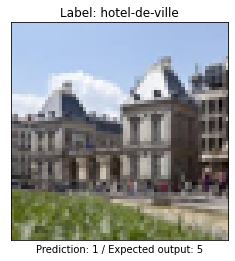

In [26]:
showImg(X_valid[picture_test], y_valid[picture_test], test_before);

In [27]:
nb_rows_train = X_train.shape[0]
random_idx_train = np.random.choice(nb_rows_train, 200, replace=False)

nb_rows_valid = X_valid.shape[0]
random_idx_valid = np.random.choice(nb_rows_valid, 200, replace=False)

In [28]:
print(len(X_train), len(y_train))
print(len(X_valid), len(y_valid))

print(random_idx_train)
print(random_idx_valid)

3417 3417
1032 1032
[1066  295 3283   34  548  861 3279 2072 2858 2404  655  287  826  134
 1284   11 2552 3409 2540 1383 2802 2306  730 2076  278  538 1423  381
  751 1476 3168 2599 1208 2154 2379 1473   48 1564  431 2097 1357 2870
  424 2715 2288 3310 2894 2751 3185 1896  499 1029 1542 2682  365 1390
 2738 2006  231 2565 2431  913 1988 2827 1151  524 3066  575  165  246
  444  592   82  626  949 1437 2856  728 2910  211 2137  379  689 2852
  301  534 2762 2111  506 1978 2865 2085 2357 1010  132  388 2993 3080
 2519 1608  349 3272  457 2272 1454 2787 1829 2843 2377 2598 1985 2709
 1938 3082  476  742 1986 1209 1848 2806 2233 2132 2158 1769 1379 1997
 2890 1203  218 3375 2139   14 2117  945  305 2753 2588 1498 3369  401
 2435  299 1072  766  309 3224 3365 1659 1799 2278 3002 2295  392 1205
 3301   56 2129 2759  609  744 2455  480  221 2485 1487  230  698 3215
 3385 2258 1036 1569 1262 1039 2268  256 2050 3025  503 1649  156 2873
 2792  226  549  363  238 2643  328 2835  294 3043 2430 1

In [1]:
accuracy(X_train[random_idx_train, :], y_train[random_idx_train, :])

NameError: name 'accuracy' is not defined

In [31]:
accuracy(X_valid[random_idx_valid, :], y_valid[random_idx_valid, :])

Accuracy: 16.5%


In [1]:
train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X_train, y_train.flatten(), epochs=10000)#, alpha=0.01)

NameError: name 'train_classification_stochastic_gradient_backpropagation_mlp_model' is not defined

In [2]:
test_after = predict_mlp_model_classification(p_model, X_valid[picture_test], len_output_layer)

print("After training:", test_after)
print("Class index : ", np.argmax(test_after))
print("Class expected :", np.argmax(y_train[picture_test]))

NameError: name 'predict_mlp_model_classification' is not defined

In [3]:
showImg(X_valid[picture_test], y_valid[picture_test], test_after);

NameError: name 'showImg' is not defined

In [4]:
accuracy(X_train[random_idx_train, :], y_train[random_idx_train, :])

NameError: name 'accuracy' is not defined

In [5]:
accuracy(X_valid[random_idx_valid, :], y_valid[random_idx_valid, :])

NameError: name 'accuracy' is not defined

In [6]:
destroy_mlp_model(p_model)

NameError: name 'destroy_mlp_model' is not defined

## MLP - Discover new architectures